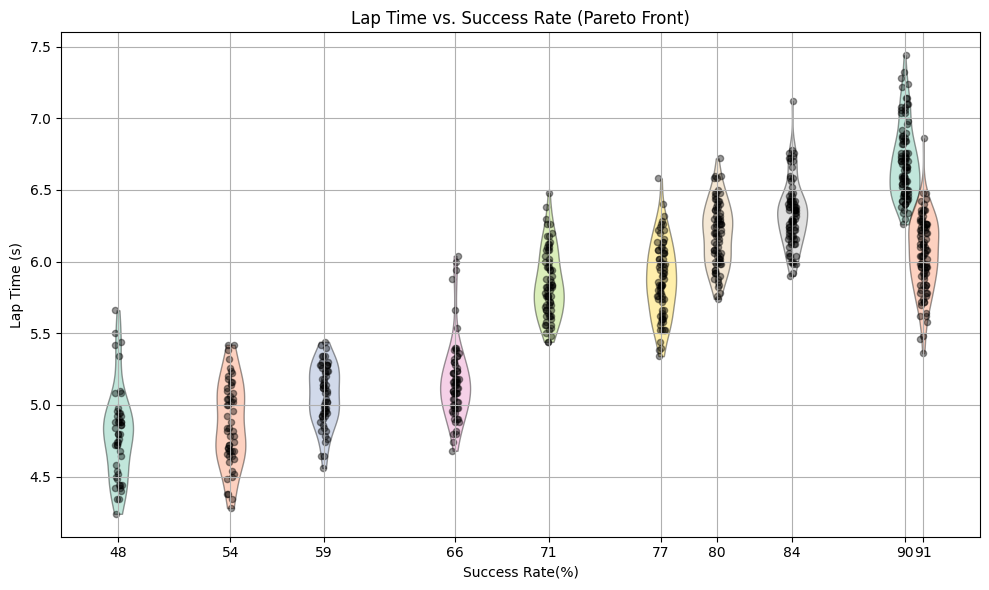

In [47]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from sympy import true

# === 数据准备 ===

file_group_pairs = {
    f: pd.read_csv(f).query("`Lap Times` != -1").shape[0] / pd.read_csv(f).shape[0] * 100
    for f in os.listdir(".") if f.startswith("roll_outs") and f.endswith(".csv")
}

all_data = []
for file, group in file_group_pairs.items():
    df = pd.read_csv(file)
    df = df[df["Lap Times"] != -1]
    df["Group"] = group
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)
df_all["Group"] = pd.to_numeric(df_all["Group"])
unique_groups = sorted(df_all["Group"].unique())

# === 手动绘图 ===
plt.figure(figsize=(10, 6))
palette = plt.cm.Set2.colors
palette = sns.color_palette("Set2", n_colors=len(unique_groups))

for i, group in enumerate(unique_groups):
    y = df_all[df_all["Group"] == group]["Lap Times"].values
    x = np.full_like(y, group)

    # Violin: 用 KDE 拟合密度
    kde = gaussian_kde(y)
    y_vals = np.linspace(min(y), max(y), 200)
    densities = kde(y_vals)
    densities = densities / densities.max() * 0.8  # 缩放宽度

    # 画 violin 左右
    plt.fill_betweenx(y_vals, group - densities, group + densities,
                      facecolor=palette[i], alpha=0.4, edgecolor="k")

    # # Boxplot（用 matplotlib）
    # q1, med, q3 = np.percentile(y, [25, 50, 75])
    # iqr = q3 - q1
    # whisker_low = y[y >= q1 - 1.5 * iqr].min()
    # whisker_high = y[y <= q3 + 1.5 * iqr].max()
    # plt.plot([group - 0.2, group + 0.2], [med, med], color='darkred', lw=2)
    # plt.plot([group, group], [q1, q3], color='k', lw=3)
    # plt.plot([group, group], [whisker_low, q1], color='k', lw=1)
    # plt.plot([group, group], [q3, whisker_high], color='k', lw=1)

    # Strip scatter
    jitter = (np.random.rand(len(y)) - 0.5) * 0.4
    plt.scatter(x + jitter, y, color='black', alpha=0.4, s=20)

# === 设置横轴 ===
plt.xticks(unique_groups, [str(int(g)) for g in unique_groups])
plt.xlabel(r"Success Rate(%)")
plt.ylabel("Lap Time (s)")
plt.grid(True)
plt.title("Lap Time vs. Success Rate (Pareto Front)")
plt.tight_layout()
plt.show()


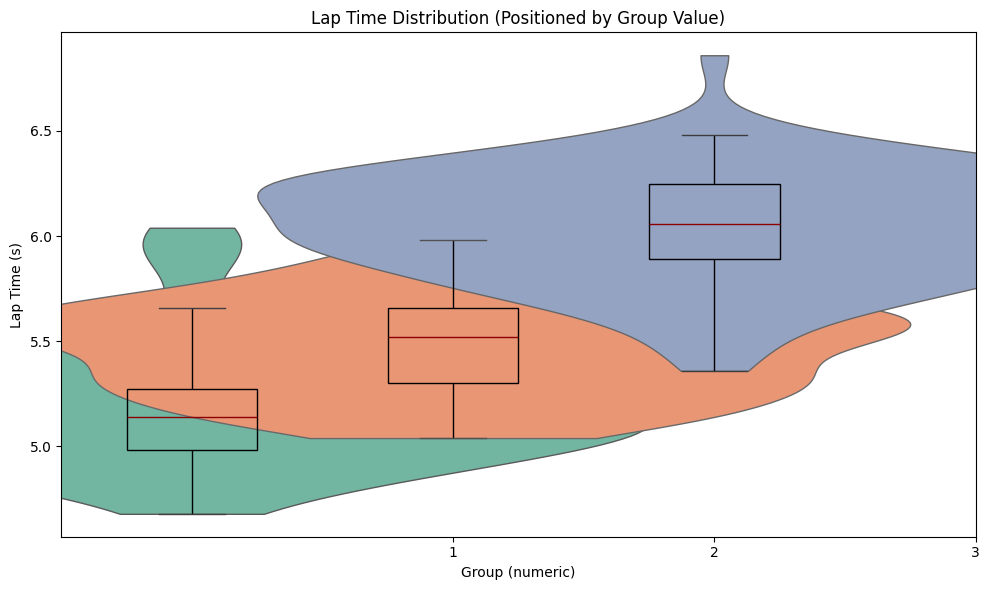

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# === 配置：你所有的 CSV 文件路径和对应组名 ===
file_group_pairs = {
    "roll_outs_91_605.csv": 3,
    "roll_outs_66_517.csv": 1,
    "roll_outs_65_548.csv": 2,
}

# === 合并所有组数据 ===
all_data = []

for file, group_name in file_group_pairs.items():
    df = pd.read_csv(file)
    df = df[df["Lap Times"] != -1]           # 过滤未完成
    df["Group"] = group_name                 # 添加组名
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)
df_all["Group"] = pd.to_numeric(df_all["Group"])  # 确保是数值型

# === 绘图 ===
plt.figure(figsize=(10, 6))

unique_groups = sorted(df_all["Group"].unique())
palette = sns.color_palette("Set2", len(unique_groups))

for i, group in enumerate(unique_groups):
    subset = df_all[df_all["Group"] == group]
    x_vals = np.full(len(subset), group)  # 所有x坐标等于group数值

    # Violin plot
    sns.violinplot(x=x_vals, y=subset["Lap Times"],
                   inner=None,
                   color=palette[i],
                   linewidth=1,
                   width=3.5,  # 控制宽度
                   cut=0)

    # Box plot
    sns.boxplot(x=x_vals, y=subset["Lap Times"],
                width=0.5,
                showcaps=True,
                boxprops={"facecolor": "none", "edgecolor": "black"},
                whiskerprops={"linewidth": 1, "color": "black"},
                medianprops={"color": "darkred"},
                showfliers=False)

    # # Strip plot / scatter plot
    # jitter = (np.random.rand(len(subset)) - 0.5) * 2.0  # 抖动
    # plt.scatter(x_vals + jitter * 0.3, subset["Lap Times"], color="black", alpha=0.4, s=30)

# 设置横轴为 group 的实际数值
plt.xticks(unique_groups, [str(int(g)) for g in unique_groups])
plt.xlabel("Group (numeric)")
plt.ylabel("Lap Time (s)")
plt.title("Lap Time Distribution (Positioned by Group Value)")
plt.tight_layout()
plt.show()


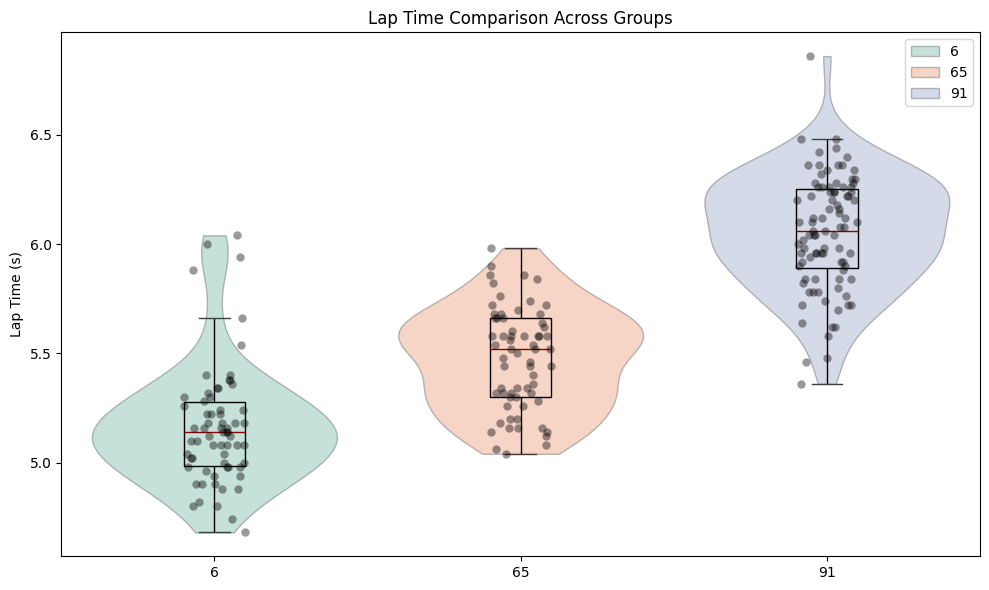

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === 配置：你所有的 CSV 文件路径和对应组名 ===
file_group_pairs = {
    "roll_outs_91_605.csv": 91,
    "roll_outs_66_517.csv": 6,
    "roll_outs_65_548.csv": 65,
}

# === 合并所有组数据 ===
all_data = []

for file, group_name in file_group_pairs.items():
    df = pd.read_csv(file)
    df = df[df["Lap Times"] != -1]           # 过滤未完成
    df["Group"] = group_name                 # 添加组名
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)

# === 绘图 ===
plt.figure(figsize=(10, 6))

# Violin plot
sns.violinplot(x="Group", y="Lap Times", data=df_all,
               hue="Group",       # 根据组着色
               palette="Set2",    # 配色
               inner=None,        # 不显示默认 box
               linewidth=1,
               dodge=False,       # 关键：不分开，重叠在一起
               alpha=0.4,         # 设置透明度
               cut=0              # 不超出数据范围
)
# Box plot
sns.boxplot(x="Group", y="Lap Times", data=df_all,
            width=0.2,
            showcaps=True,
            boxprops={"facecolor": "none", "edgecolor": "black"},
            whiskerprops={"linewidth": 1, "color": "black"},
            medianprops={"color": "darkred"},
            showfliers=False)

# Strip plot
sns.stripplot(x="Group", y="Lap Times", data=df_all, jitter=True, alpha=0.4, color="black", size=6)

plt.title("Lap Time Comparison Across Groups")
plt.ylabel("Lap Time (s)")
plt.xlabel("")
plt.tight_layout()
plt.show()


/tmp/ipykernel_280802/950825500.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Group"] = "Lap Times"


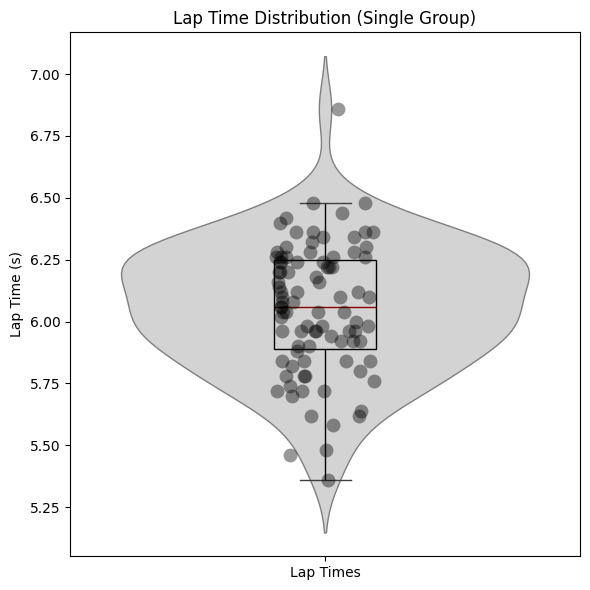

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("roll_outs.csv")

# 过滤掉未完成的数据（Lap Time 为 -1）
df_filtered = df[df["Lap Times"] != -1]

plt.figure(figsize=(6, 6))

# 添加一列用于 x 轴标签（只有一组）
df_filtered["Group"] = "Lap Times"

# Violin plot：显示分布，去掉默认 box
sns.violinplot(x="Group", y="Lap Times", data=df_filtered, inner=None, color="lightgray", linewidth=1)

# Box plot：透明填充，只显示边框和中位数
sns.boxplot(x="Group", y="Lap Times", data=df_filtered,
            width=0.2,
            showcaps=True,
            boxprops={"facecolor": "none", "edgecolor": "black"},
            whiskerprops={"linewidth": 1, "color": "black"},
            medianprops={"color": "darkred"},
            showfliers=False)

# Strip plot：显示散点，带透明度和抖动
sns.stripplot(x="Group", y="Lap Times", data=df_filtered, jitter=True, alpha=0.4, color="black", size=10)

plt.title("Lap Time Distribution (Single Group)")
plt.ylabel("Lap Time (s)")
plt.xlabel("")
plt.tight_layout()
plt.show()
